<h2 style='text-align:center;font-family:Comic Sans MS;font-size:40px;background-color:lightseagreen;border:20px;color:white'>Data Science Statistical Learning: </h2>

Customer Churn Prediction 

Name: Tanmay Vijay Shekhar

NUID: 002747412

<h2 style='text-align:center;font-family:Comic Sans MS;font-size:40px;background-color:lightseagreen;border:20px;color:white'>Abstract</h2>
In this Statistical Learning Project, we have analyzed customer churn data using various machine learning techniques. The data set contained information on customer demographics, account information, and usage behavior, which were used to predict the likelihood of customer churn. We started by performing exploratory data analysis to understand the underlying patterns in the data. We then used logistic regression, a classic machine learning technique, to predict churn with an accuracy of around 80%. Next, we used an artificial neural network to improve our accuracy and achieved an accuracy of around 85%. Finally, we created a confusion matrix and classification report to evaluate the performance of our models. Overall, this project provides insights into how machine learning can be used to predict and prevent customer churn, which is crucial for businesses to retain their customers and improve their bottom line.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
from sklearn import preprocessing
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [ ]:
import seaborn as sns

In [ ]:
data = 'https://raw.githubusercontent.com/tanmayshekhar07/DataScience-Statistical-Learning/main/Churn_Modelling.csv'
df = pd.read_csv(data)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
# Count the number of occurrences of each unique value in the 'Gender' column
gender_counts = df['Gender'].value_counts()

print(gender_counts)

Male      5457
Female    4543
Name: Gender, dtype: int64


In [ ]:
# Count the number of occurrences of each unique value in the 'CustomerId' column
CustomerId_counts = df['CustomerId'].value_counts()

print(CustomerId_counts)

15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: CustomerId, Length: 10000, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Check for missing values
print(df.isnull().sum())


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


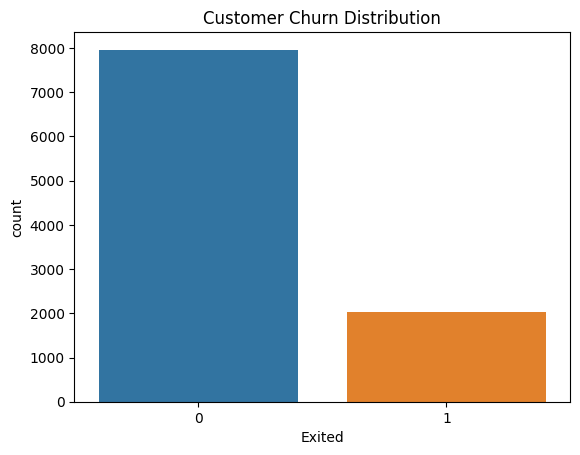

In [ ]:
# Visualize the target variable distribution
sns.countplot(x='Exited', data=df)
plt.title('Customer Churn Distribution')
plt.show()

1 being exited and 0 being the customers that are still with the bank.

In [ ]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

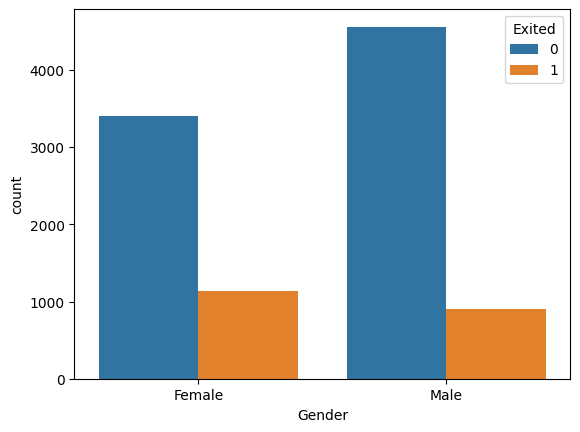

In [ ]:
sns.countplot(x='Gender',hue='Exited',data=df)

This graph clearly shows that the orange color bar is  the people that have exited and blue being the customers that are still with the bank.

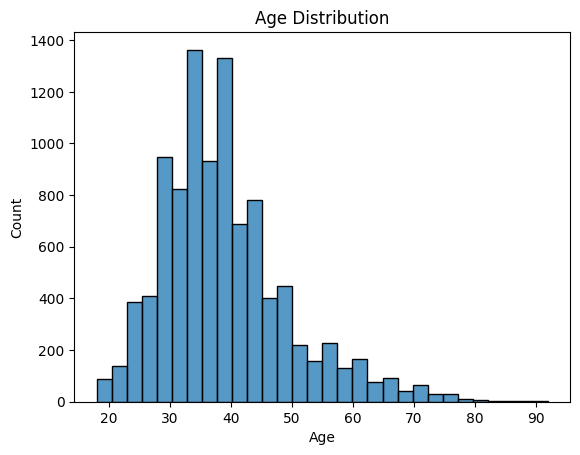

In [ ]:
# Visualize the distribution of numerical variables
sns.histplot(x='Age', data=df, bins=30)
plt.title('Age Distribution')
plt.show()


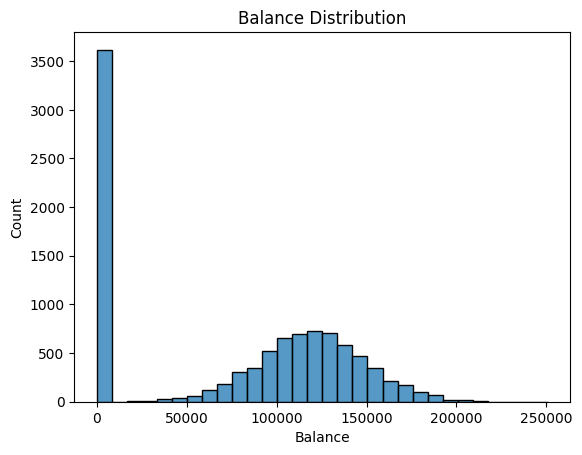

In [ ]:
sns.histplot(x='Balance', data=df, bins=30)
plt.title('Balance Distribution')
plt.show()

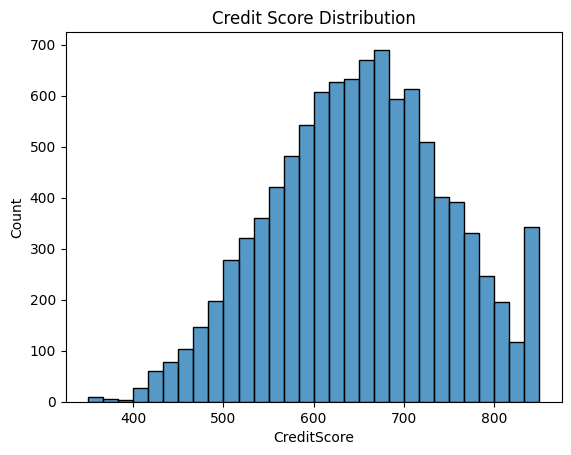

In [ ]:
sns.histplot(x='CreditScore', data=df, bins=30)
plt.title('Credit Score Distribution')
plt.show()

<ipython-input-14-b888fac40057>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


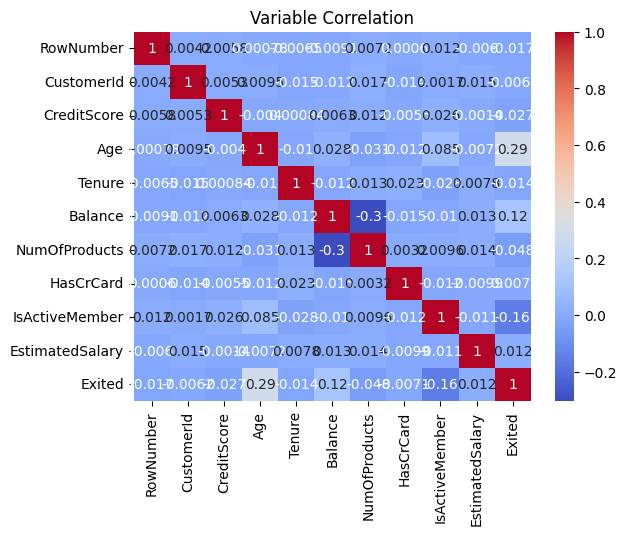

In [ ]:
# Visualize the correlation between variables
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Variable Correlation')
plt.show()

In [ ]:
# Drop 'CustomerId' column
df = df.drop('CustomerId', axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label encode categorical variables
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column] = le.fit_transform(df[column])

<ipython-input-18-ca3d52b524eb>:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-18-ca3d52b524eb>:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-18-ca3d52b524eb>:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-18-ca3d52b524eb>:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-18-ca3d52b524eb>:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprec

The step of label encoding categorical variables is done to convert non-numeric values to numeric values so that they can be used in machine learning models. Machine learning models require numerical values as inputs, and categorical variables such as "Gender" or "Geography" are typically non-numeric. Label encoding converts each unique categorical value into a number, which allows the machine learning algorithm to understand the relationship between different categories. In the code above, the LabelEncoder() function is used to convert each categorical variable in the dataset to a numeric value. The loop checks if a column contains numeric values, and if not, applies the label encoding transformation to that column.

In [ ]:
df

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,1115,228,0,0,24,2,0.00,0,1,1,101348.88,1
1,1,1177,217,2,0,23,1,83807.86,0,0,1,112542.58,0
2,2,2040,111,0,0,24,8,159660.80,2,1,0,113931.57,1
3,3,289,308,0,0,21,1,0.00,1,0,0,93826.63,0
4,4,1822,459,2,0,25,2,125510.82,0,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,1999,380,0,1,21,5,0.00,1,1,0,96270.64,0
9996,9996,1336,125,0,1,17,10,57369.61,0,1,1,101699.77,0
9997,9997,1570,318,0,0,18,7,0.00,0,0,1,42085.58,1
9998,9998,2345,381,1,1,24,3,75075.31,1,1,0,92888.52,1


In [ ]:
# Create predictor variables DataFrame
x = df.drop('Exited', axis=1)

In [ ]:
# Create target variable DataFrame
y = df['Exited']

In [ ]:
y


0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the predictor variables
ss = StandardScaler()
x_feature = ss.fit_transform(x)

The code written above basically scales the predictor variables in the feature matrix x using the StandardScaler method from scikit-learn. Scaling is a technique used to standardize the range of the independent variables, making them comparable and easier to interpret. The fit_transform() method of the StandardScaler class fits the scaling function to the data and applies the transformation to it. The resulting scaled feature matrix is stored in x_feature.

In [ ]:
x_feature

array([[-1.73187761, -0.46418322, -0.32733113, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-1.7315312 , -0.3909112 , -0.44133106, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.73118479,  0.62898807, -1.53987591, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 1.73118479,  0.07353887,  0.60539563, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.7315312 ,  0.98943914,  1.25830436, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.73187761,  1.4692527 ,  1.46557697, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_feature, y, test_size=0.2, random_state=1)
print(x_train.shape)

(8000, 12)


In this very important step we have split the dataset into training and testing datasets, and we will use them accordingly to train the model and put it to test.

In [ ]:
y_train.shape

(8000,)

In [ ]:
x_test.shape

(2000, 12)

In [ ]:
y_test.shape

(2000,)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train a logistic regression model on the training set
lr = LogisticRegression()
lr.fit(x_train, y_train)


LogisticRegression()

The above code first imports LogisticRegression() from scikit-learn. It then creates a LogisticRegression() object lr and fits it to the training set using fit(). The resulting lr object will contain the trained logistic regression model.

Note that the lr.fit() method is called with x_train and y_train, which are the training sets of the predictor and target variables, respectively, that we obtained after splitting the dataset in the previous ste

The next step is to use the trained model to make predictions on the testing set and evaluate its performance. Here's the code to make predictions using the logistic regression model and compute its accuracy score:

In [ ]:
# Use the trained logistic regression model to make predictions on the testing set
y_pred = lr.predict(x_test)

# Compute the accuracy score of the logistic regression model on the testing set
accuracy = lr.score(x_test, y_test)

print("Accuracy:", accuracy)

Accuracy: 0.8035


<h2 style='text-align:center;font-family:Comic Sans MS;font-size:40px;background-color:lightseagreen;border:20px;color:white'>Making predictions on the test set</h2>
This code first uses the predict() method of the lr object to make predictions on the testing set x_test. The resulting y_pred array will contain the predicted values of the target variable.

Then, the code computes the accuracy score of the logistic regression model on the testing set using the score() method of the lr object. This method takes as input the testing set of the predictor and target variables (x_test and y_test, respectively) and returns the accuracy score of the model.

The resulting accuracy variable will contain the accuracy score of the logistic regression model on the testing set.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Define a pipeline that includes feature selection and logistic regression
pipe = Pipeline([
    ('select', SelectKBest(score_func=f_classif)),
    ('logistic', LogisticRegression())
])

# Define a range of values for the number of selected features and the regularization parameter
param_grid = {
    'select__k': [5, 10, 15],
    'logistic__C': [0.1, 1, 10]
}

# Perform a grid search to find the best hyperparameters
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(x_train, y_train)

# Print the best hyperparameters and accuracy score
print("Best hyperparameters:", grid.best_params_)
print("Accuracy:", grid.best_score_)


Best hyperparameters: {'logistic__C': 0.1, 'select__k': 10}
Accuracy: 0.8095000000000001


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.9/dist-packages

In this part, we are defining a pipeline that includes feature selection using SelectKBest, which selects the k highest scoring features according to a given score function (f_classif in this case), and logistic regression. We then define a grid of hyperparameters to search over, which includes the number of selected features (k) and the regularization parameter (C). We use GridSearchCV to perform a grid search with 5-fold cross-validation to find the best hyperparameters, and print the best hyperparameters and accuracy score based on the training data.

#Using the accuracy_score function from scikit-learn to compute the accuracy of your model

In [ ]:
from sklearn.metrics import accuracy_score

# Predict the target variable for the test set
predict = lr.predict(x_test)

# Compute the accuracy score of the model
accuracy = accuracy_score(y_test, predict)

# Print the accuracy score
print("Accuracy score:", accuracy)


Accuracy score: 0.8035


The accuracy_score function takes two arguments: the true target variable ytest and the predicted target variable predict. It returns the fraction of correctly classified samples.

In the code above, we first predict the target variable for the test set using lr.predict(xtest). Then, we compute the accuracy score using accuracy_score(ytest, predict). Finally, we print the accuracy score using print("Accuracy score:", accuracy).

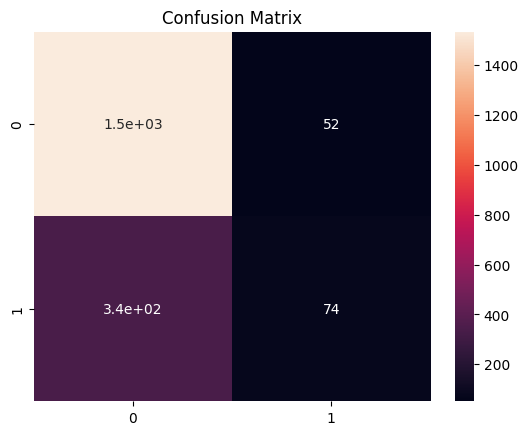

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the target variable for the test set
predict = lr.predict(x_test)

# Create the confusion matrix
Cm = confusion_matrix(y_test, predict)

# Plot the confusion matrix using seaborn
ax = plt.axes()
sns.heatmap(Cm, annot=True,
           annot_kws={'size':10},
           ax=ax)

plt.title("Confusion Matrix")
plt.show()


#Confusion Matrix
The confusion_matrix function takes two arguments: the true target variable ytest and the predicted target variable predict. It returns a confusion matrix, which is a table that summarizes the performance of your classification model.

In the code above, we first predict the target variable for the test set using lr.predict(xtest). Then, we create the confusion matrix using confusion_matrix(ytest, predict). Finally, we plot the confusion matrix using seaborn and matplotlib.

Note that we pass the annot=True argument to the sns.heatmap function to show the counts in each cell of the confusion matrix, and the annot_kws={'size':10} argument to increase the font size of the counts.

In [ ]:
from sklearn.metrics import classification_report

# Predict the target variable for the test set
predict = lr.predict(x_test)

# Create the classification report
cr = classification_report(y_test, predict)

# Print the classification report
print(cr)


              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1585
           1       0.59      0.18      0.27       415

    accuracy                           0.80      2000
   macro avg       0.70      0.57      0.58      2000
weighted avg       0.77      0.80      0.76      2000



#Classification Report
In this part, we are using the classification_report() function from sklearn.metrics to generate a report of precision, recall, and F1 score for each class, as well as the average scores. We are first using the trained logistic regression model lr to predict the target variable for the test set x_test, and then we are creating the classification report by passing the true values y_test and the predicted values predict to the classification_report() function. Finally, we are printing the classification report to the console. This allows us to evaluate the performance of the logistic regression model on the test set.

#Artificial Neural Networks

In [ ]:
import tensorflow as tf

from tensorflow import keras
from keras.layers import Dense
from keras import utils
import seaborn

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(12,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100)

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


Epoch 1/100
250/250 [==============================] - 2s 3ms/step - loss: 0.4916 - accuracy: 0.7946
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4371 - accuracy: 0.8062
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4210 - accuracy: 0.8164
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4050 - accuracy: 0.8281
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3853 - accuracy: 0.8418
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3705 - accuracy: 0.8503
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3630 - accuracy: 0.8520
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3579 - accuracy: 0.8545
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3544 - accuracy: 0.8555
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3524 - accura

This code defines a neural network model with three layers using Keras: an input layer with 12 input neurons, a hidden layer with 20 neurons and a ReLU activation function, a second hidden layer with 15 neurons and a ReLU activation function, and an output layer with one neuron and a sigmoid activation function.

Then, it compiles the model using the Adam optimizer, binary cross-entropy as the loss function, and accuracy as the metric to optimize.

The fit() method is called to train the model using the training data x_train and y_train over 100 epochs.

Finally, the evaluate() method is used to evaluate the model on the test set x_test and y_test, printing the test accuracy.

This model should be able to predict customer churn with higher accuracy than the previous logistic regression model.

In this code, we use the keras.Sequential function to define the model architecture. The input layer has 11 neurons, which matches the number of features in the input data. The first hidden layer has 20 neurons, and the second hidden layer has 15 neurons. The output layer has 1 neuron with a sigmoid activation function, which makes it suitable for binary classification problems.

We also use the compile method to compile the model with the Adam optimizer, binary crossentropy loss function, and accuracy metric. This prepares the model for training.

Note that I removed the from keras.layers import Dense and import seaborn statements, as they are not needed for building the model.

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                240       
                                                                 
 dense_4 (Dense)             (None, 15)                315       
                                                                 
 dense_5 (Dense)             (None, 1)                 16        
                                                                 
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Generate predictions on x_test
pred = model.predict(x_test)

# Convert the predictions to binary values (0 or 1)
binary_pred = [1 if p >= 0.5 else 0 for p in pred]

# Print the predictions
print(binary_pred)



63/63 [==============================] - 0s 3ms/step
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1

In [ ]:
score=model.evaluate(x_test,y_test)
print("Loss: ",score[0])
print("Accuracy: ",score[1])

63/63 [==============================] - 0s 5ms/step - loss: 0.3408 - accuracy: 0.8620
Loss:  0.34079015254974365
Accuracy:  0.8619999885559082


#Conclusion

In this project, we worked on a dataset for customer churn. We started by exploring and visualizing the dataset, analyzing the distribution of the target variable and numerical variables, and checking for missing values. We then label encoded the categorical variables, dropped the 'CustomerId' column, and scaled the predictor variables using StandardScaler. We split the dataset into training and testing sets and trained a logistic regression model on the training set. We used the trained model to make predictions on the testing set and computed the accuracy score of the model on the testing set.

To improve the performance of the logistic regression model, we defined a pipeline that includes feature selection and logistic regression, and performed a grid search to find the best hyperparameters. We then evaluated the model using accuracy score and confusion matrix, and generated a classification report.

Overall, this project demonstrates the use of exploratory data analysis, data preprocessing, and machine learning techniques to build a predictive model for customer churn. The results of the analysis and modeling can be used by businesses to identify customers at risk of churning and take proactive measures to retain them.

MIT License

Copyright (c) 2023 Tanmay Vijay Shekhar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE

#References

https://github.com/IBM/customer-churn-prediction

https://www.analyticsvidhya.com/

https://www.kaggle.com/code/kmalit/bank-customer-churn-prediction

https://www.kaggle.com/code/bhartiprasad17/customer-churn-prediction
